<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

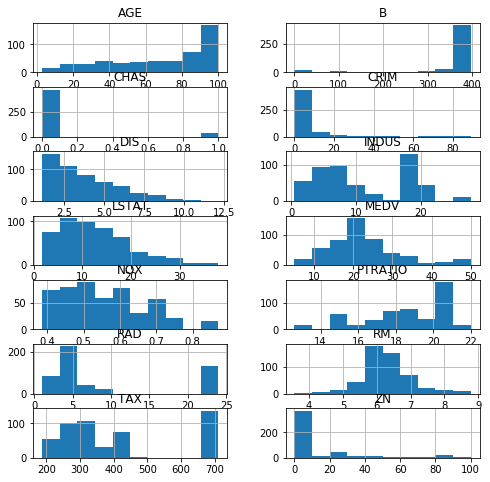

In [3]:
#added back y to the datafram to explore data in full, I drop it later
X.loc[:,'MEDV'] = y

#explore
X.head()
X.shape
X.dtypes
X.describe()
X.nunique()

#set the rows and column since there were 14 variables
fig,ax = plt.subplots(nrows = 7, ncols = 2, figsize = (8,8))
X.hist(ax=ax);
X.columns

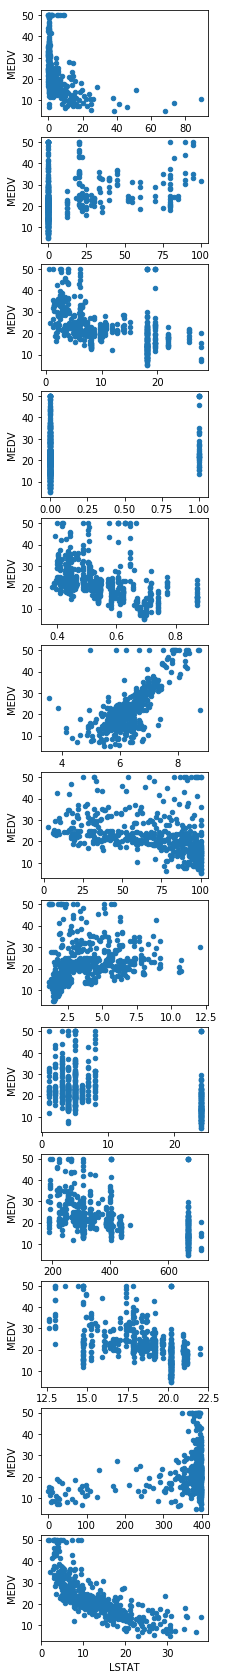

In [4]:
fig, axes = plt.subplots(nrows=13, ncols=1, figsize=(3,30))

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

#in order to avoid typing out each variable, created  a loop to do scatter chart for each variable against y
for xcol, ax in zip(column_names, axes):
    X.plot(kind='scatter', x=xcol, y='MEDV', ax=ax)

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [5]:
X.loc[:,'Prediction'] = X.MEDV.mean()
X.head()
X.MEDV.mean()

from sklearn import metrics
metrics.mean_squared_error(X.MEDV, X.Prediction)

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#drop y now that we are ready to do regression
X = X.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(metrics.mean_squared_error(y_train,y_pred_train))
print(metrics.mean_squared_error(y_test, y_pred_test))

#MSE went down quite a bit, the model has improved

21.00273827721499
25.553544617551328


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,shuffle=True)
kf.split(X,y)

list(kf.split(X,y))
n = 0
mse_values_test = 0
mse_values_train = 0

#cycle through all 10 splits and perform LR on each, storing results into containers above
for train_index, test_index in kf.split(X,y):
    
    lr = LinearRegression()
    X_train = X.loc[train_index,:]
    y_train = y.loc[train_index]
    lr.fit(X_train,y_train)
    
    X_test = X.loc[test_index,:]
    y_test = y.loc[test_index]
    
    mse_test = metrics.mean_squared_error(y_test, lr.predict(X_test))
    mse_values_test += mse_test
    
    mse_train = metrics.mean_squared_error(y_train, lr.predict(X_train))
    mse_values_train += mse_train
    
    n +=1
    print('MSE test: ',mse_test)
    print('MSE train: ',mse_train)


print(mse_values_test/10)
print(mse_values_train/10)

#want to print the MSE for both the test and train data sets

MSE test:  32.774806460616006
MSE train:  20.844985782970433
MSE test:  27.369030371544095
MSE train:  21.464534325588577
MSE test:  9.038466537371434
MSE train:  23.38071089774741
MSE test:  14.904820816041031
MSE train:  22.798478707036047
MSE test:  26.918138598028563
MSE train:  21.467446678805832
MSE test:  23.989323793964907
MSE train:  21.854594600396354
MSE test:  31.196180452781377
MSE train:  20.995163539672795
MSE test:  18.82716173160863
MSE train:  22.29347961761001
MSE test:  31.115714773610453
MSE train:  21.08577838442821
MSE test:  25.51089118614743
MSE train:  21.648034616946955
24.164453472171395
21.78332071512026


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

It did slightly better

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

the test set performed worse than the training set, means there is more of a variance problem

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

variance - because when we were able to use more data to test with (k fold) the test MSE was lowered, so more data did improve the model

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [8]:
#dropped B, ZN and CHAS but model actually got worse
X = X.drop(['B'],axis=1)

from sklearn.model_selection import KFold

kf = KFold(n_splits=10,shuffle=True)
kf.split(X,y)

list(kf.split(X,y))
n = 0
mse_values_test = 0
mse_values_train = 0
    
for train_index, test_index in kf.split(X,y):
    
    lr = LinearRegression()
    X_train = X.loc[train_index,:]
    y_train = y.loc[train_index]
    lr.fit(X_train,y_train)
    
    X_test = X.loc[test_index,:]
    y_test = y.loc[test_index]
    
    mse_test = metrics.mean_squared_error(y_test, lr.predict(X_test))
    mse_values_test += mse_test
    
    mse_train = metrics.mean_squared_error(y_train, lr.predict(X_train))
    mse_values_train += mse_train
    
    n +=1
    print('MSE test: ',mse_test)
    print('MSE train: ',mse_train)

#get the average of all 10 MSEs as the overall number to compare
print(mse_values_test/10)
print(mse_values_train/10)

MSE test:  23.26589947963629
MSE train:  22.397870705524934
MSE test:  26.108951715757893
MSE train:  22.152172537149543
MSE test:  17.122421796962588
MSE train:  23.16672316797291
MSE test:  42.599203914450996
MSE train:  20.31831568276212
MSE test:  14.192048659752503
MSE train:  23.421675286561666
MSE test:  22.527876181637083
MSE train:  22.62893373414569
MSE test:  41.14320719584115
MSE train:  20.72605413531917
MSE test:  22.7322613279061
MSE train:  22.53196098956983
MSE test:  15.6245986085832
MSE train:  23.28564915182021
MSE test:  20.254798901841852
MSE train:  22.72467398092497
24.557126778236967
22.3354029371751


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [9]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [10]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [11]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [12]:
iris.loc[:,'species_num'] = (iris.loc[:,'species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}))


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

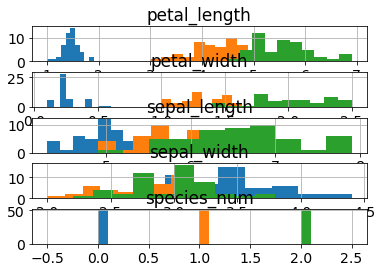

In [13]:
iris.shape
iris.dtypes
iris.isnull().sum()
iris.describe()
iris.nunique()

fig,ax = plt.subplots(nrows = 5, ncols = 1)
iris.groupby('species').hist(ax=ax);



- Get the accuracy of a null model that simply predicts the most common species.

In [14]:
#They are all equally common so it would just be 30% correct

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [25]:
XX = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
yy = iris.loc[:,'species_num']


from sklearn.neighbors import KNeighborsClassifier


kf = KFold(n_splits=10,shuffle=True,random_state=99)
kf.split(XX,yy)

list(kf.split(XX,yy))
n = 0
as_values_test = 0
as_values_train = 0
    
for train_index, test_index in kf.split(XX,yy):
    
    knn = KNeighborsClassifier(n_neighbors=5)
    XX_train = XX.loc[train_index,:]
    yy_train = yy.loc[train_index]
    knn.fit(XX_train,yy_train)
    
    XX_test = XX.loc[test_index,:]
    yy_test = yy.loc[test_index]
    
    as_test = metrics.accuracy_score(yy_test, knn.predict(XX_test))
    as_values_test += as_test
    
    as_train = metrics.accuracy_score(yy_train, knn.predict(XX_train))
    as_values_train += as_train
    
    n +=1
    print('AS test: ',as_test)
    print('AS train: ',as_train)


print(as_values_test/10)
print(as_values_train/10)

AS test:  0.9333333333333333
AS train:  0.9703703703703703
AS test:  0.9333333333333333
AS train:  0.9703703703703703
AS test:  0.9333333333333333
AS train:  0.9777777777777777
AS test:  1.0
AS train:  0.9629629629629629
AS test:  1.0
AS train:  0.9629629629629629
AS test:  0.9333333333333333
AS train:  0.9703703703703703
AS test:  0.9333333333333333
AS train:  0.9777777777777777
AS test:  0.9333333333333333
AS train:  0.9629629629629629
AS test:  1.0
AS train:  0.9703703703703703
AS test:  1.0
AS train:  0.9777777777777777
0.9600000000000002
0.9703703703703704


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Much better! It tells me that variance is the key issue because as we added more features, the model got more accurate

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

slightly better on the training data but hardly. the model is well fitted

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

variance


- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [26]:
kf = KFold(n_splits=10,shuffle=True,random_state=99)
n = 0
as_values_test = 0
as_values_train = 0
    
for train_index, test_index in kf.split(XX,yy):
    
    knn = KNeighborsClassifier(n_neighbors=2)
    XX_train = XX.loc[train_index,:]
    yy_train = yy.loc[train_index]
    knn.fit(XX_train,yy_train)
    
    XX_test = XX.loc[test_index,:]
    yy_test = yy.loc[test_index]
    
    as_test = metrics.accuracy_score(yy_test, knn.predict(XX_test))
    as_values_test += as_test
    
    as_train = metrics.accuracy_score(yy_train, knn.predict(XX_train))
    as_values_train += as_train
    
    n +=1
    print('AS test: ',as_test)
    print('AS train: ',as_train)


print(as_values_test/10)
print(as_values_train/10)

#not really able to make the test % over 96% , model got worse

AS test:  0.9333333333333333
AS train:  0.9777777777777777
AS test:  0.9333333333333333
AS train:  0.9851851851851852
AS test:  0.9333333333333333
AS train:  0.9777777777777777
AS test:  1.0
AS train:  0.9703703703703703
AS test:  1.0
AS train:  0.9777777777777777
AS test:  0.8666666666666667
AS train:  0.9851851851851852
AS test:  0.9333333333333333
AS train:  0.9777777777777777
AS test:  1.0
AS train:  0.9777777777777777
AS test:  0.8666666666666667
AS train:  0.9851851851851852
AS test:  1.0
AS train:  0.9777777777777777
0.9466666666666667
0.9792592592592593


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

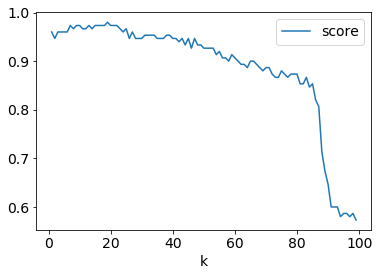

In [40]:
scores = []
as_values_test = 0 
n = 0

for k in range(1,100): 
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    for train_index, test_index in kf.split(XX,yy):
       
        kf = KFold(n_splits=10,shuffle=True, random_state=99)
        
        XX_train = XX.loc[train_index,:]
        yy_train = yy.loc[train_index]
        knn.fit(XX_train,yy_train)

        XX_test = XX.loc[test_index,:]
        yy_test = yy.loc[test_index]

        as_test = metrics.accuracy_score(yy_test, knn.predict(XX_test))
        as_values_test += as_test

        n +=1
        
    test_accuracy = (as_values_test / 10)
    scores.append([k,test_accuracy])
    as_values_test = 0

data = pd.DataFrame(scores,columns=['k','score'])
fig, ax = plt.subplots()
data.plot(kind='line',x='k',y='score',ax=ax);

#need a nested for loop to iterate first on k values then on the k-folds

In [41]:
scores

[[1, 0.96],
 [2, 0.9466666666666667],
 [3, 0.96],
 [4, 0.9600000000000002],
 [5, 0.9600000000000002],
 [6, 0.9600000000000002],
 [7, 0.9733333333333334],
 [8, 0.9666666666666668],
 [9, 0.9733333333333334],
 [10, 0.9733333333333334],
 [11, 0.9666666666666668],
 [12, 0.9666666666666668],
 [13, 0.9733333333333334],
 [14, 0.9666666666666668],
 [15, 0.9733333333333334],
 [16, 0.9733333333333334],
 [17, 0.9733333333333334],
 [18, 0.9733333333333334],
 [19, 0.9800000000000001],
 [20, 0.9733333333333334],
 [21, 0.9733333333333334],
 [22, 0.9733333333333334],
 [23, 0.9666666666666668],
 [24, 0.9600000000000002],
 [25, 0.9666666666666668],
 [26, 0.9466666666666669],
 [27, 0.9600000000000002],
 [28, 0.9466666666666669],
 [29, 0.9466666666666667],
 [30, 0.9466666666666667],
 [31, 0.9533333333333334],
 [32, 0.9533333333333335],
 [33, 0.9533333333333335],
 [34, 0.9533333333333335],
 [35, 0.9466666666666669],
 [36, 0.9466666666666669],
 [37, 0.9466666666666669],
 [38, 0.9533333333333335],
 [39, 0.953

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [18]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Mon, 04 Jun 2018   Prob (F-statistic):          1.59e-321
Time:                        22:35:52   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

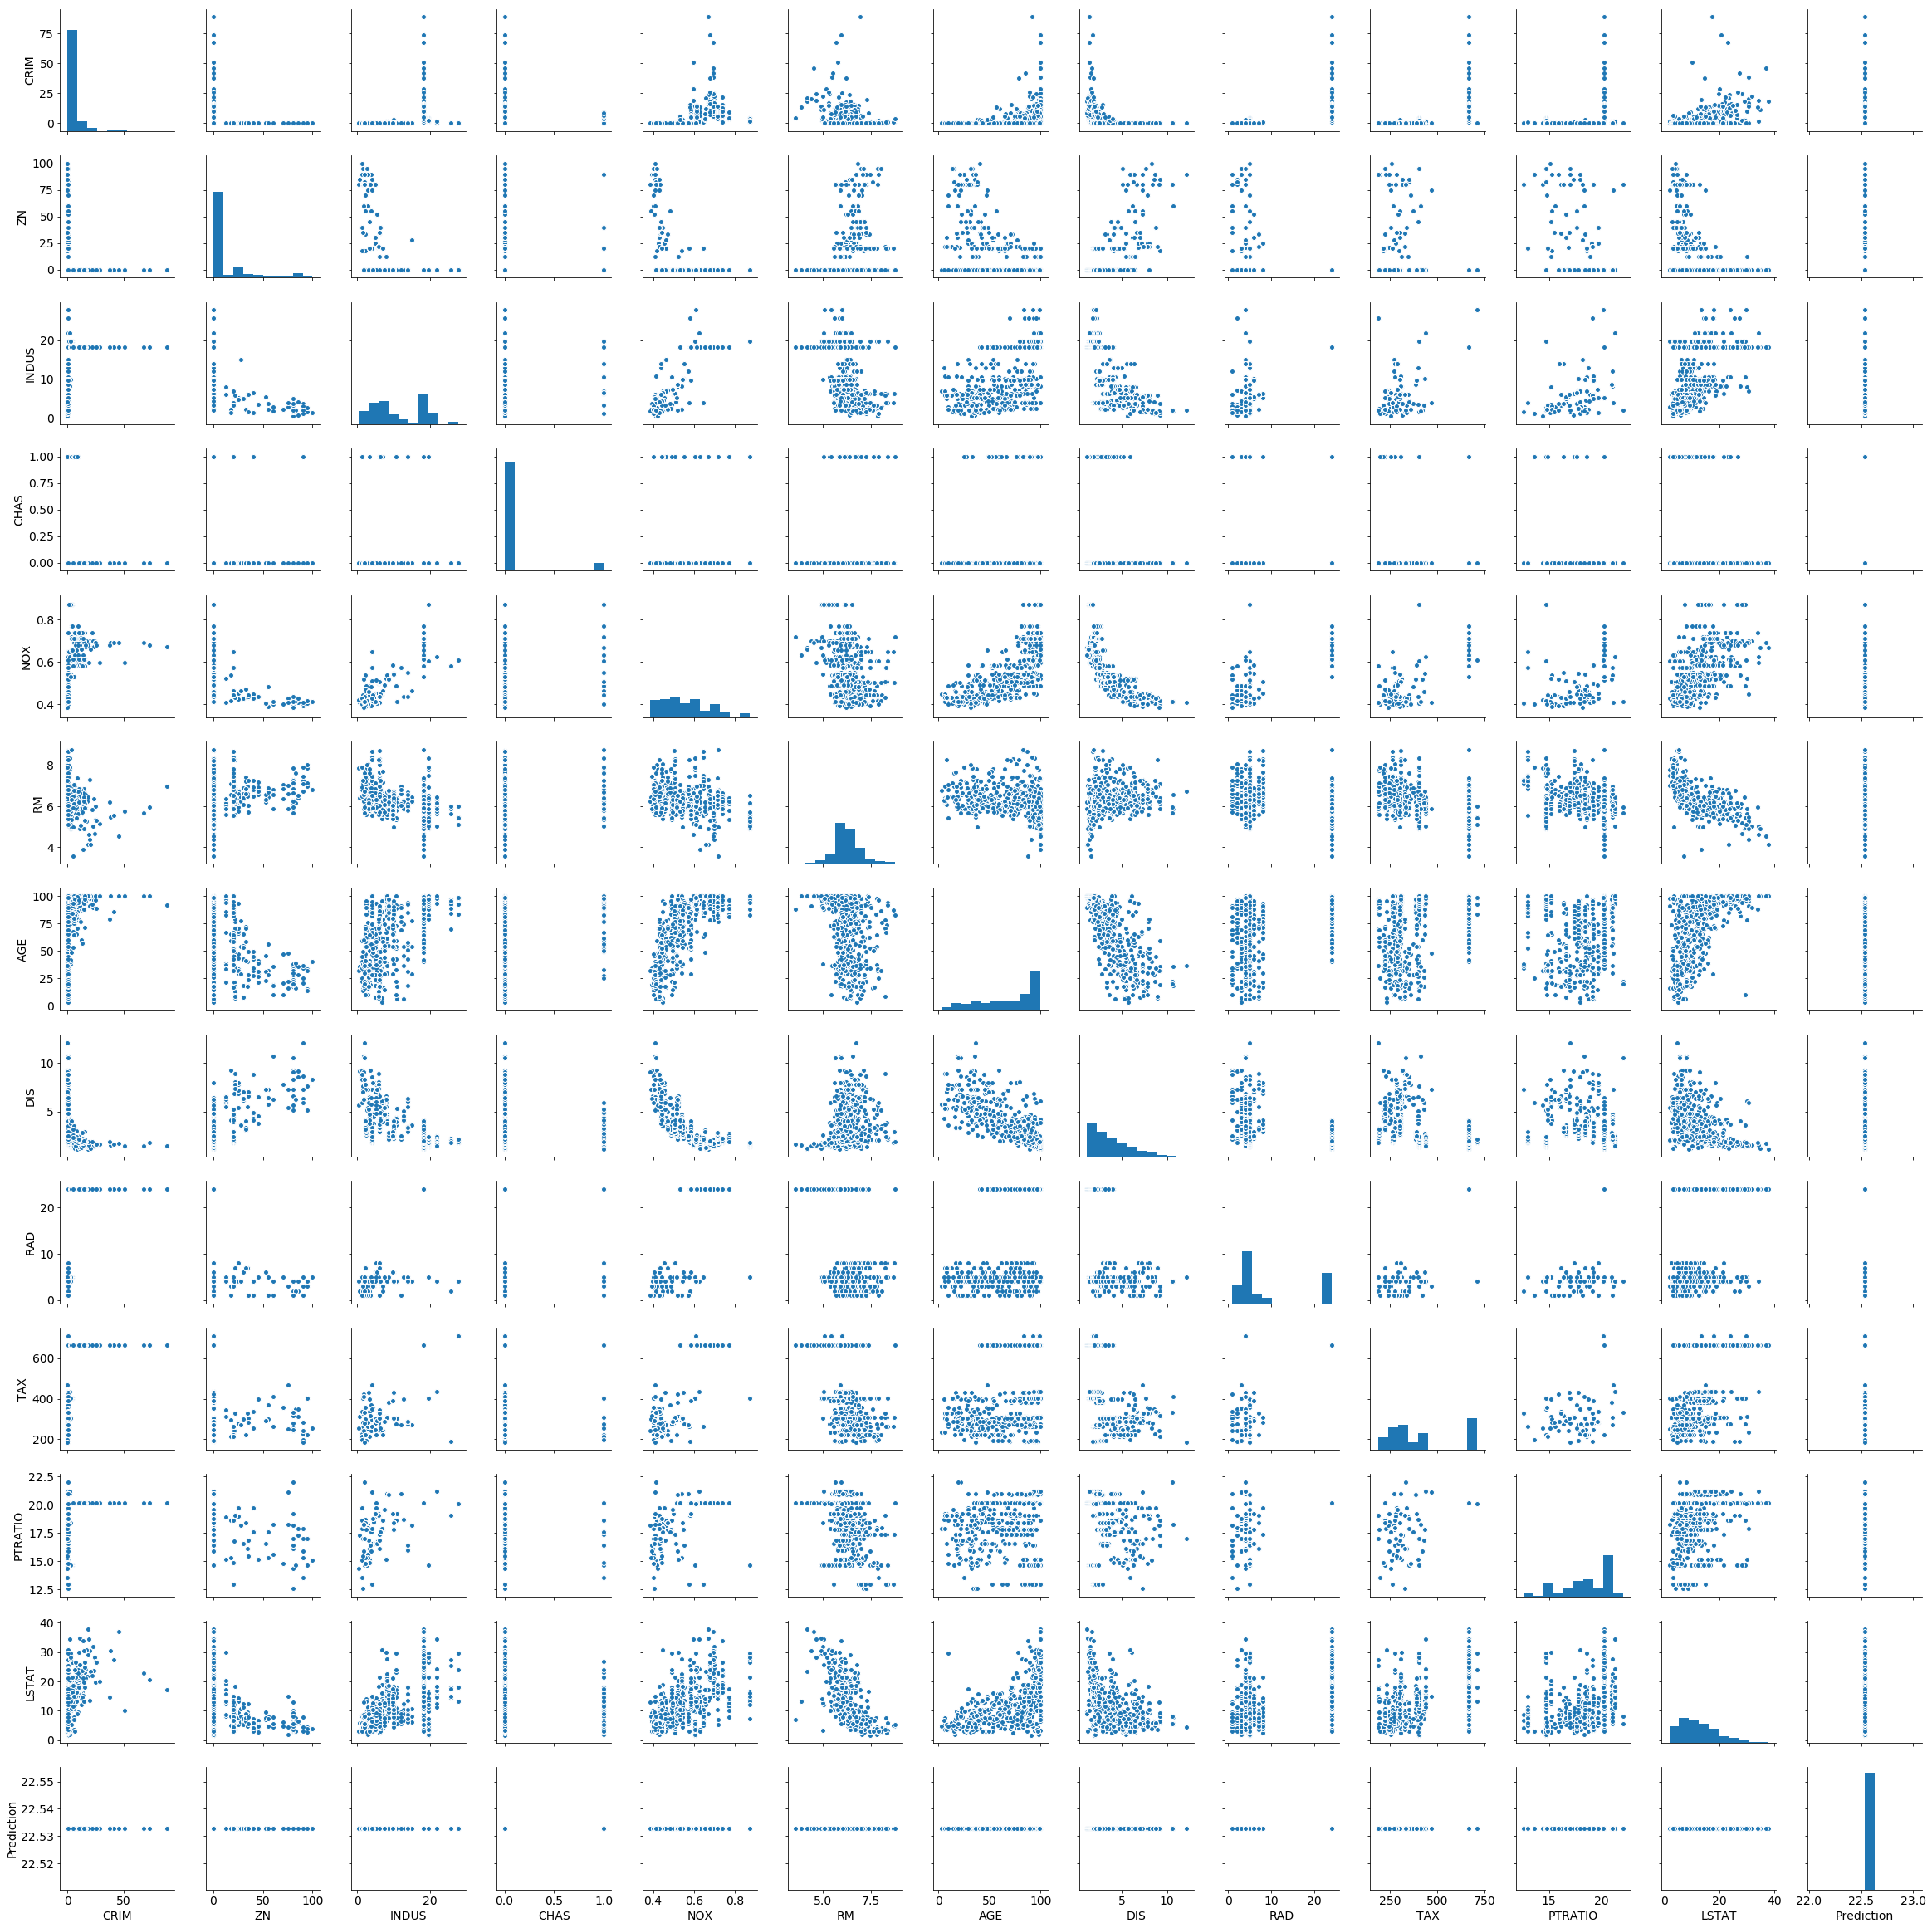

In [20]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [21]:
# Check out Pearson scores


## Demo: Patsy

In [22]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [23]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\Users\Michelle Fasano\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.45063724729483423
